In [76]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [77]:
# Read CSV 
data_df = pd.read_csv('glassdoordata.csv')


In [78]:
# Rename Columns & Organize
renamed_data_df = data_df.rename(columns={"Company Name Witheld":"Company", "Low Salry":"Low Salary", "Job Description":"job_description", "Job Title":"job_title"})
industry_df = renamed_data_df.set_index('Industry')
industry_cat_df = industry_df.rename(index={"Accounting":"Business/Finance/Accounting", "Advertising & Marketing" : "Business/Finance/Accounting", "Banks & Building Societies":"Business/Finance/Accounting", "Insurance Agencies & Brokerages":"Business/Finance/Accounting","Insurance Operators":"Business/Finance/Accounting","Investment Banking & Asset Management":"Business/Finance/Accounting","Lending":"Business/Finance/Accounting",
                          "Computer Hardware & Software":"Computer/Internet", "Enterprise Software & Network Solutions":"Computer/Internet", "IT Services":"Computer/Internet","Internet":"Computer/Internet", "Research & Development":"Computer/Internet","Enterprise Software & Network Solutions":"Computer/Internet", 
                          "Consulting" : "Consulting/Recruiting", "Staffing & Outsourcing" :"Consulting/Recruiting",   
                          "Charitable Foundations" : "Education", "Colleges & Universities": "Education", "Religious Organisations":"Education",
                          "Areospace & Defense": "Government/Military", "Government Agencies": "Government/Military",
                          "Biotech & Pharmaceuticals": "Healthcare","Healthcare Services & Hospitals": "Healthcare",
                          "Estate Agents":"Sales/HR/Retail/Services","General Merchandise & Superstores":"Sales/HR/Retail/Services","Legal":"Sales/HR/Retail/Services","Publishing":"Sales/HR/Retail/Services","Telecommunications Services":"Sales/HR/Retail/Services","Utilities":"Sales/HR/Retail/Services","Video Games":"Sales/HR/Retail/Services","holesale":"Sales/HR/Retail/Services","Brokerage Services":"Sales/HR/Retail/Services","Catering & Food Service Contractors":"Sales/HR/Retail/Services", 
                          "Membership Organisations":"Life/Physical/Social Sciences",
                          "Asphalt Product Manufacturing":"Manufacturing/Mechanical/Construction","Chemical Manufacturing":"Manufacturing/Mechanical/Construction", "Consumer Products Manufacturing":"Manufacturing/Mechanical/Construction","Industrial Manufacturing":"Manufacturing/Mechanical/Construction"})

industry_cat_df.head(50)

,Company,job_title,Pay Type,High Salary,Low Salary,job_description,Country,"City, State",Rating Average,Number of Ratings
Industry,,,,,,,,,,
Healthcare Product Manufacturing,"Auris Health, Inc.",Program Manager,NaN,NaN,NaN,<strong>Overview:</strong>\n<br/><br/>\nAs the...,US,"Redwood City, CA",0.75,2812
Computer/Internet,Applications Software Technology LLC,Associate Consultant- Technology,ANNUAL,76591.0,52158.0,<strong>Have a Technology Background?\n<br/>\n...,US,"Lisle, IL",0.99,2850
NaN,Seen by Indeed,Project Manager,NaN,NaN,NaN,<div><div><div><strong>Seen by Indeed is a fre...,US,"San Francisco, CA",NaN,2869
Electrical & Electronic Manufacturing,Power Monitors,Sales Engineer,ANNUAL,71791.0,47259.0,"<p>Power Monitors, Inc. is seeking a Sales Eng...",US,"Mount Crawford, VA",0.31,2875
Electrical & Electronic Manufacturing,Carnegie Robotics,Senior Mechanical Engineer,ANNUAL,162918.0,64786.0,<p><strong>Role:</strong> Senior Mechanical En...,US,"Pittsburgh, PA",1.00,2931
Computer/Internet,"Ellation, Inc.","Sr. Product Manager, Community & Video Experience",ANNUAL,163692.0,113444.0,<div>\n<div>\n<div>\n<div><strong>Crunchyroll<...,US,"San Francisco, CA",0.43,3008
Computer/Internet,Kite.com,Machine Learning Engineer,NaN,NaN,NaN,Programmers spend too much time doing repetiti...,US,"San Francisco, CA",1.00,3022
Sales/HR/Retail/Services,TracFone Wireless,"Sr. Analyst, Product Operations",ANNUAL,111171.0,68753.0,TracFone is seeking an individual who will man...,US,"Miami, FL",0.27,3050
Travel Agencies,Fareportal Inc.,Business Intelligence Analyst,ANNUAL,77022.0,54645.0,<strong>(We are not sponsoring for this role n...,US,"New York, NY",0.69,8476


In [79]:
# find data positions and concat
data_analyst_df = industry_cat_df[(industry_cat_df['job_title'] == "Data Analyst")]
data_engineer_df = industry_cat_df[(industry_cat_df['job_title'] == "Data Engineer")]
data_scientist_df = industry_cat_df[(industry_cat_df['job_title'] == "Data Scientist")]
data_jobs_df = pd.concat([data_analyst_df,data_engineer_df,data_scientist_df], ignore_index=False)
data_jobs_df.head()

,Company,job_title,Pay Type,High Salary,Low Salary,job_description,Country,"City, State",Rating Average,Number of Ratings
Industry,,,,,,,,,,
Business/Finance/Accounting,North American Savings Bank,Data Analyst,ANNUAL,76361.0,48957.0,<h3>Job Description</h3><div>North American Sa...,US,"Kansas City, MO",0.88,14139
Healthcare,ADURO,Data Analyst,ANNUAL,79363.0,52900.0,<strong><div>SUMMARY</strong>:</div>\n\n<br/><...,US,"Redmond, WA",0.67,19719
Computer/Internet,Stefanini,Data Analyst,ANNUAL,68589.0,40217.0,<div><strong>Stefanini is looking for a Data A...,US,"Reading, PA",0.71,35072
Consulting/Recruiting,Source One Technical Solutions,Data Analyst,NaN,NaN,NaN,Data Analyst\n<br/><br/>\n<strong>Job Descript...,US,"Hicksville, NY",1.00,35180
NaN,Akinnovate,Data Analyst,NaN,NaN,NaN,<h3>Job Description</h3><div><strong>Responsib...,US,"Washington, DC",1.00,47154


In [80]:
title_df = data_jobs_df.groupby('job_title')['job_title'].count().sort_values(ascending=False)
title_df.head(50)

job_title
Data Analyst      255
Data Scientist    164
Data Engineer      33
Name: job_title, dtype: int64

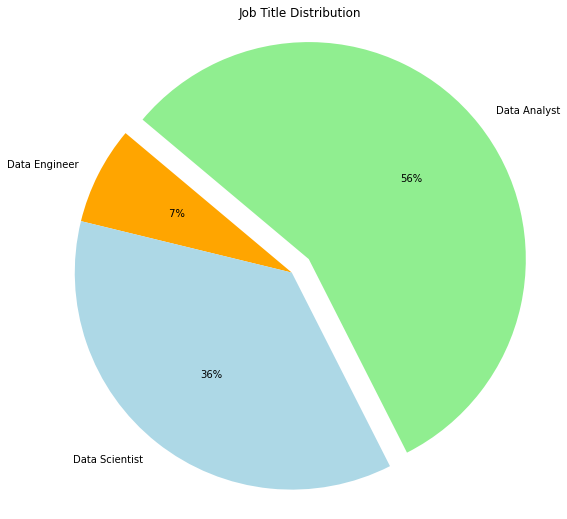

In [81]:
# do a pie chart of the number of job openings for different levels
topic =  ["Data Engineer", "Data Scientist", "Data Analyst"]

# Labels for the sections of our pie chart
labels = list(topic)
# The values of each section of the pie chart
sizes = [33, 164, 255]

# The colors of each section of the pie chart
colors = ["orange", "lightblue", "lightgreen"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

plt.figure(figsize=(9,9))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%2.f%%", startangle=140)

plt.axis("equal")
plt.title('Job Title Distribution')
plt.show()

In [83]:
grouped_cat = data_jobs_df.groupby('Industry')['job_title'].count().sort_values(ascending=False)
grouped_cat.head(50)

Industry
Computer/Internet                        131
Consulting/Recruiting                    101
Business/Finance/Accounting               44
Sales/HR/Retail/Services                  27
Healthcare                                18
Education                                  9
Aerospace & Defence                        9
Manufacturing/Mechanical/Construction      8
Government/Military                        3
Film Production & Distribution             3
Sports & Recreation                        3
Music Production & Distribution            2
Life/Physical/Social Sciences              2
Haulage                                    2
Home Furniture and Houseware Shops         1
Transportation Management                  1
Financial Transaction Processing           1
News Outlets                               1
Department, Clothing, & Shoe Shops         1
Security Services                          1
Sporting Goods Shops                       1
Wholesale                                  1
N

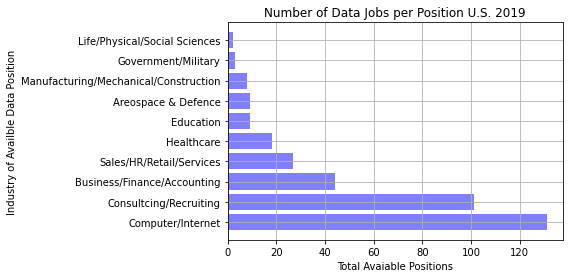

<Figure size 432x288 with 0 Axes>

In [84]:
# Bar Chart, Position by industry
positions = ['Computer/Internet','Consultcing/Recruiting','Business/Finance/Accounting','Sales/HR/Retail/Services','Healthcare','Education','Areospace & Defence',
            'Manufacturing/Mechanical/Construction', 'Government/Military','Life/Physical/Social Sciences']
             
value = [131, 101,44,27,18,9,9,8,3,2]
plt.barh(positions, value, color='b', alpha=0.5, align="center")

plt.title("Number of Data Jobs per Position U.S. 2019")
plt.xlabel("Total Avaiable Positions")
plt.ylabel("Industry of Availble Data Position")

plt.grid()
plt.show()
plt.tight_layout()

In [85]:
# --------- 1) Technical Skills ------------

# finalized technical skill set keywords:

# Statistics / Statistical Analysis
# Research / Research Design
# Question Formulation 
# Visualization
# Deep Learning
# Machine Learning
# Domain Knowledge
# Analysis / Analytical
# Cloud Computing (AWS)
# Regression
# Probability
# Prediction
# Network / Neural Networks

# create new columns with above keywords to store the flag,
# indicating if that specific keyword is included in the description
# 0 -> not included; 
# 1 -> included

# initialize the flag tags
data_jobs_df['TS_Stats_flag'] = 0 
data_jobs_df['TS_Research_flag'] = 0 
data_jobs_df['TS_QuesForm_flag'] = 0 
data_jobs_df['TS_Visual_flag'] = 0 
data_jobs_df['TS_DeepLearning_flag'] = 0 
data_jobs_df['TS_MachineLearning_flag'] = 0 
data_jobs_df['TS_DomainKnowledge_flag'] = 0 
data_jobs_df['TS_Analy_flag'] = 0 
data_jobs_df['TS_CloudComp_flag'] = 0 
data_jobs_df['TS_Regress_flag'] = 0 
data_jobs_df['TS_Probability_flag'] = 0 
data_jobs_df['TS_Prediction_flag'] = 0 
data_jobs_df['TS_NeuralNetwork_flag'] = 0 
data_jobs_df.head(5)

,Company,job_title,Pay Type,High Salary,Low Salary,job_description,Country,"City, State",Rating Average,Number of Ratings,...,TS_Visual_flag,TS_DeepLearning_flag,TS_MachineLearning_flag,TS_DomainKnowledge_flag,TS_Analy_flag,TS_CloudComp_flag,TS_Regress_flag,TS_Probability_flag,TS_Prediction_flag,TS_NeuralNetwork_flag
Industry,,,,,,,,,,,,,,,,,,,,,
Business/Finance/Accounting,North American Savings Bank,Data Analyst,ANNUAL,76361.0,48957.0,<h3>Job Description</h3><div>North American Sa...,US,"Kansas City, MO",0.88,14139,...,0,0,0,0,0,0,0,0,0,0
Healthcare,ADURO,Data Analyst,ANNUAL,79363.0,52900.0,<strong><div>SUMMARY</strong>:</div>\n\n<br/><...,US,"Redmond, WA",0.67,19719,...,0,0,0,0,0,0,0,0,0,0
Computer/Internet,Stefanini,Data Analyst,ANNUAL,68589.0,40217.0,<div><strong>Stefanini is looking for a Data A...,US,"Reading, PA",0.71,35072,...,0,0,0,0,0,0,0,0,0,0
Consulting/Recruiting,Source One Technical Solutions,Data Analyst,NaN,NaN,NaN,Data Analyst\n<br/><br/>\n<strong>Job Descript...,US,"Hicksville, NY",1.00,35180,...,0,0,0,0,0,0,0,0,0,0
NaN,Akinnovate,Data Analyst,NaN,NaN,NaN,<h3>Job Description</h3><div><strong>Responsib...,US,"Washington, DC",1.00,47154,...,0,0,0,0,0,0,0,0,0,0


In [86]:
for irow in np.arange(len(data_jobs_df)):
    
    if ("statist" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,10] = 1
    
    if (("reasearch" in data_jobs_df.job_description[irow]) or ("research design" in data_jobs_df.job_description[irow])):
        data_jobs_df.iloc[irow,11] = 1
        
    if ("question formulation" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,12] = 1
        
    if ("visual" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,13] = 1
    
    if ("deep learning" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,14] = 1  
    
    if (("machine learning" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,15] = 1
    
    if (("domain knowledge" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,16] = 1
    
    if (("analy" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,17] = 1
    
    if (("cloud comp" in data_jobs_df.job_description[irow]) or ("contractor" in data_jobs_df.job_description[irow])):
        data_jobs_df.iloc[irow,18] = 1
        
    if (("regres" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,19] = 1
    
    if (("probabil" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,20] = 1
    
    if (("prediction" in data_jobs_df.job_description[irow]) or ("forecast" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,21] = 1
    
    if (("neural network" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,22] = 1

TS_keywords = ['Statistics', 'Research', 'Question Formulation', 'Visualization',\
               'Deep Learning','Machine Learning','Domain Knowledge', 'Analytical',\
               'Cloud Computing', 'Regression', 'Probability', 'Prediction','Neural Networks']
TS_Count = np.arange(len(TS_keywords))

for i_tech_skill in np.arange(len(TS_keywords)):
    
    TS_Count[i_tech_skill] = data_jobs_df.iloc[:,10+i_tech_skill].sum()

TS_Count



array([219,   2,   0, 146,  19, 105,   3, 391,  17,  43,  12,  45,  13])

<Figure size 936x576 with 0 Axes>

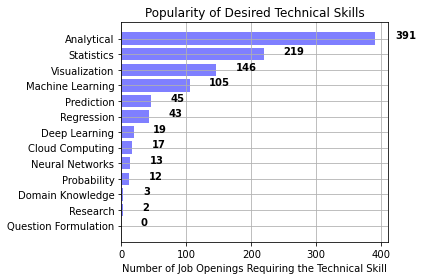

In [87]:
# construct a dataFrame using the TS keywords and TS keyword counts
df_TS = pd.DataFrame({'TS_Keywords':TS_keywords, 'TSkeywords_Counts':TS_Count})
df_TS.sort_values('TSkeywords_Counts',inplace=True)

# now do a bar chart on desired Technical Skills
plt.figure(figsize=(13,8))
fig,ax = plt.subplots()

ax.barh(df_TS.TS_Keywords, df_TS.TSkeywords_Counts, color='b', alpha=0.5, align="center")

plt.title("Popularity of Desired Technical Skills")
ax.set_xlabel("Number of Job Openings Requiring the Technical Skill")

for i, v in enumerate(df_TS.TSkeywords_Counts):
    ax.text(v + 30, i, str(v), color='black', fontweight='bold')
plt.grid()

plt.tight_layout()
plt.show()

In [88]:
# Keywords for soft skill sets:

# Communication
# Teamwork
# Question formulation
# Storytelling
# Project management

# initialize the flag tags
data_jobs_df['SS_Communication_flag'] = 0 
data_jobs_df['SS_Teamwork_flag'] = 0 
data_jobs_df['SS_QuesForm_flag'] = 0 
data_jobs_df['SS_StoryTelling_flag'] = 0 
data_jobs_df['SS_ProjManagement_flag'] = 0 

data_jobs_df.head(1)

,Company,job_title,Pay Type,High Salary,Low Salary,job_description,Country,"City, State",Rating Average,Number of Ratings,...,TS_CloudComp_flag,TS_Regress_flag,TS_Probability_flag,TS_Prediction_flag,TS_NeuralNetwork_flag,SS_Communication_flag,SS_Teamwork_flag,SS_QuesForm_flag,SS_StoryTelling_flag,SS_ProjManagement_flag
Industry,,,,,,,,,,,,,,,,,,,,,
Business/Finance/Accounting,North American Savings Bank,Data Analyst,ANNUAL,76361.0,48957.0,<h3>Job Description</h3><div>North American Sa...,US,"Kansas City, MO",0.88,14139,...,0,0,0,0,0,0,0,0,0,0


In [89]:
for irow in np.arange(len(data_jobs_df)):
    
    if (("communica" in data_jobs_df.job_description[irow]) or ("personal skill" in data_jobs_df.job_description[irow])\
       or ("people skill" in data_jobs_df.job_description[irow])):
        data_jobs_df.iloc[irow,23] = 1
    
    if (("teamwork" in data_jobs_df.job_description[irow]) or ("team work" in data_jobs_df.job_description[irow])\
          or ("team player" in data_jobs_df.job_description[irow]) or ("collabor" in data_jobs_df.job_description[irow])):
        data_jobs_df.iloc[irow,24] = 1
        
    if ("question formulation" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,25] = 1
        
    if (("story telling" in data_jobs_df.job_description[irow]) or ("storytelling" in data_jobs_df.job_description[irow])):
        data_jobs_df.iloc[irow,26] = 1
    
    if ("project management" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,27] = 1  
    
SS_keywords = ['Communication', 'Teamwork', 'Question_Formulation', 'Story_Telling','Project_Management']
SS_Count = np.arange(len(SS_keywords))

for i_tech_skill in np.arange(len(SS_keywords)):
    SS_Count[i_tech_skill] = data_jobs_df.iloc[:,23+i_tech_skill].sum()

SS_Count

array([261, 151,   0,   5,  23])

<Figure size 936x576 with 0 Axes>

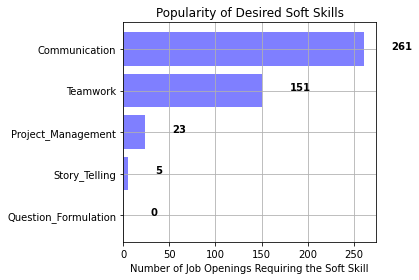

In [90]:
# construct a dataFrame using the SS keywords and SS keyword counSS
df_SS = pd.DataFrame({'SS_Keywords':SS_keywords, 'SSkeywords_Counts':SS_Count})
df_SS.sort_values('SSkeywords_Counts',inplace=True)

# now do a bar chart on desired Technical Skills
plt.figure(figsize=(13,8))
fig,ax = plt.subplots()

ax.barh(df_SS.SS_Keywords, df_SS.SSkeywords_Counts, color='b', alpha=0.5, align="center")

plt.title("Popularity of Desired Soft Skills")
ax.set_xlabel("Number of Job Openings Requiring the Soft Skill")

for i, v in enumerate(df_SS.SSkeywords_Counts):
    ax.text(v + 30, i, str(v), color='black', fontweight='bold')
plt.grid()
plt.tight_layout()
plt.show()

In [91]:
# finalized keywords for technical tools:

# Python
# SQL
# JavaScript / Java
# MongoDB
# Hadoop
# Database
# Excel / VBA
# R
# Spark
# Tableau
# D3

# initialize the flag tags
data_jobs_df['SS_Python_flag'] = 0 
data_jobs_df['SS_SQL_flag'] = 0 
data_jobs_df['SS_JavaScript_flag'] = 0 
data_jobs_df['SS_MongoDB_flag'] = 0 
data_jobs_df['SS_Hadoop_flag'] = 0 
data_jobs_df['SS_Database_flag'] = 0 
data_jobs_df['SS_ExcelVBA_flag'] = 0 
data_jobs_df['SS_R_flag'] = 0 
data_jobs_df['SS_Spark_flag'] = 0 
data_jobs_df['SS_Tableau_flag'] = 0 
data_jobs_df['SS_D3_flag'] = 0 

data_jobs_df.head(1)

,Company,job_title,Pay Type,High Salary,Low Salary,job_description,Country,"City, State",Rating Average,Number of Ratings,...,SS_SQL_flag,SS_JavaScript_flag,SS_MongoDB_flag,SS_Hadoop_flag,SS_Database_flag,SS_ExcelVBA_flag,SS_R_flag,SS_Spark_flag,SS_Tableau_flag,SS_D3_flag
Industry,,,,,,,,,,,,,,,,,,,,,
Business/Finance/Accounting,North American Savings Bank,Data Analyst,ANNUAL,76361.0,48957.0,<h3>Job Description</h3><div>North American Sa...,US,"Kansas City, MO",0.88,14139,...,0,0,0,0,0,0,0,0,0,0


In [92]:
for irow in np.arange(len(data_jobs_df.head(1))):    

    if ("python" in data_jobs_df.job_description[irow]):
        data_jobs_df.head(1).iloc[irow,10] = 1
    
    if ("sql" in data_jobs_df.job_description[irow]) :
        data_jobs_df.head(1).iloc[irow,11] = 1
        
    if ("java" in data_jobs_df.job_description[irow]):
        data_jobs_df.head(1).iloc[irow,12] = 1
        
    if ("mangodb" in data_jobs_df.job_description[irow]) :
        data_jobs_df.head(1).iloc[irow,13] = 1
    
    if ("hadoop" in data_jobs_df.job_description[irow]):
        data_jobs_df.head(1).iloc[irow,14] = 1  
        
    if ("database" in data_jobs_df.job_description[irow]):
        data_jobs_df.head(1).iloc[irow,15] = 1
        
    if (("excel" in data_jobs_df.job_description[irow]) or ("vba" in data_jobs_df.job_description[irow])) :
        data_jobs_df.head(1).iloc[irow,16] = 1
        
    if ((" r " in data_jobs_df.job_description[irow]) or (" r." in data_jobs_df.job_description[irow])\
        or ((" r," in data_jobs_df.job_description[irow]))):
        data_jobs_df.iloc[irow,17] = 1
        
    if ("spark" in data_jobs_df.job_description[irow]) :
        data_jobs_df.iloc[irow,18] = 1
    
    if ("tableau" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,19] = 1  
        
    if ("d3" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,20] = 1  
    
TT_keywords = ['Python', 'SQL', 'Java', 'MangoDB','Hadoop','Database','Excel/VBA','R','Spark','Tableau','D3']
TT_Count = np.arange(len(TT_keywords))

for i_tech_tool in np.arange(len(TT_keywords)):
    TT_Count[i_tech_tool] = data_jobs_df.iloc[:,10+i_tech_tool].sum()

print(TT_Count)

# construct a dataFrame using the TT keywords and TT keyword counSS
df_TT = pd.DataFrame({'TT_Keywords':TT_keywords, 'TTkeywords_Counts':TT_Count})
df_TT.sort_values('TTkeywords_Counts',inplace=True)

[219   2   0 146  19 105   3 391  17  43  12]


<Figure size 936x576 with 0 Axes>

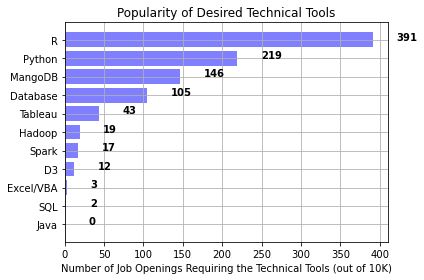

In [93]:
# now do a bar chart on desired Technical Skills
plt.figure(figsize=(13,8))
fig,ax = plt.subplots()

ax.barh(df_TT.TT_Keywords, df_TT.TTkeywords_Counts, color='b', alpha=0.5, align="center")

plt.title("Popularity of Desired Technical Tools")
ax.set_xlabel("Number of Job Openings Requiring the Technical Tools (out of 10K)")

for i, v in enumerate(df_TT.TTkeywords_Counts):
    ax.text(v + 30, i, str(v), color='black', fontweight='bold')
plt.grid()
plt.tight_layout()
plt.show()